In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import statsmodels
import statsmodels.tsa.api as smt
import statsmodels.api as sm
from statsmodels.tools.eval_measures import rmse
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import pmdarima as pm
from pmdarima import model_selection
import pickle
from statsmodels.tsa.seasonal import seasonal_decompose
from pmdarima import auto_arima
  
# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

In [4]:
def loadData(fileName):
    dir=os.path.dirname(os.path.abspath("__file__"))
    # dir = os.path.dirname(__file__)
    # print("abs---",dir)
    filename = dir+'\\data\\' + fileName;
    # print("filename--",filename)
    return pd.read_csv(filename, low_memory=False,encoding='latin-1')  

In [5]:
data1 = loadData('final_data.csv')
# data
# data=data.set_index("SCH_DEP_DATE")
data1=data.sort_values(by='SCH_DEP_DATE')
data1.SCH_DEP_DATE=pd.to_datetime(data1["SCH_DEP_DATE"], format='%Y-%m-%d')
data1['ts'] = data1[['SCH_DEP_DATE']].apply(lambda x: x[0].timestamp(), axis=1).astype(int)
# num_missing = (data[["CHG_WT_BU_sum","SCH_DEP_DATE"]] == 0).sum()
# report the results
# print(num_missing)
# print(data.isnull().sum())
date = data1["ts"].to_numpy()
ch_wt = data1["CHG_WT_BU_sum"].to_numpy()
# s_array = data[["ts", "CHG_WT_BU_sum"]].to_numpy()
# s_array
data = pd.DataFrame({'CHG_WT_BU_sum': ch_wt, 'SCH_DEP_DATE':date}, index=date)
# df
# df = df.fillna(method='bfill').fillna(method='ffill')
result = seasonal_decompose(data["CHG_WT_BU_sum"], period = 30)
result
result.plot()


  

NameError: name 'data' is not defined

In [149]:
stepwise_fit = auto_arima(data['CHG_WT_BU_sum'], start_p = 1, start_q = 1,
                          max_p = 3, max_q = 3, m = 12,
                          start_P = 0, seasonal = True,
                          d = None, D = 1, trace = True,
                          error_action ='ignore',   # we don't want to know if an order does not work
                          suppress_warnings = True,  # we don't want convergence warnings
                          stepwise = True)           # set to stepwise
  
# # To print the summary
stepwise_fit.summary()


Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=23707.771, Time=14.59 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=24451.219, Time=0.18 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=23991.088, Time=1.57 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=6.42 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=24449.283, Time=0.12 sec
 ARIMA(1,0,1)(0,1,0)[12] intercept   : AIC=24300.842, Time=0.75 sec
 ARIMA(1,0,1)(1,1,1)[12] intercept   : AIC=inf, Time=15.84 sec
 ARIMA(1,0,1)(0,1,2)[12] intercept   : AIC=inf, Time=30.55 sec
 ARIMA(1,0,1)(1,1,0)[12] intercept   : AIC=23930.602, Time=8.59 sec
 ARIMA(1,0,1)(1,1,2)[12] intercept   : AIC=inf, Time=31.17 sec
 ARIMA(1,0,0)(0,1,1)[12] intercept   : AIC=inf, Time=9.24 sec
 ARIMA(2,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=12.60 sec
 ARIMA(1,0,2)(0,1,1)[12] intercept   : AIC=inf, Time=18.70 sec
 ARIMA(0,0,0)(0,1,1)[12] intercept   : AIC=inf, Time=7.36 sec
 ARIMA(0,0,2)(0,1,1)[12] intercept   : AIC=2376

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                 1183
Model:             SARIMAX(1, 0, 1)x(0, 1, 1, 12)   Log Likelihood              -11848.886
Date:                            Wed, 06 Oct 2021   AIC                          23707.771
Time:                                    23:03:41   BIC                          23733.099
Sample:                                         0   HQIC                         23717.324
                                           - 1183                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    257.7537     41.984      6.139      0.000     175.467     340.041
ar.L1          0.4900      0.056      8.814      0.000       0.381       0.599
ma.L1         -0.0528      0.068     -0.775      0.438      -0.186       0.081
ma.S.L12      -0.8247      0.021    -39.206      0.000      -0.866      -0.783
sigma2      4.208e+07      0.000    1.4e+11      0.000    4.21e+07    4.21e+07
===================================================================================
Ljung-Box (L1) (Q):                   0.39   Jarque-Bera (JB):                62.17
Prob(Q):                              0.53   Prob(JB):                         0.00
Heteroskedasticity (H):               3.09   Skew:                             0.04
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.13
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.41e+26. Standard errors may be unstable.
"""

In [1]:

train = data.iloc[:len(data)-50]
test = data.iloc[len(data)-50:] # set one year(12 months) for testing
  
# Fit a SARIMAX(0, 1, 1)x(2, 1, 1, 12) on the training set
from statsmodels.tsa.statespace.sarimax import SARIMAX
  
model = SARIMAX(train['CHG_WT_BU_sum'], 
                order = (0, 1, 1), 
                seasonal_order =(2, 1, 1, 364))
  
result = model.fit()
result.summary()

NameError: name 'data' is not defined

In [2]:
start = len(train)
end = len(train) + len(test) - 1
  
# Predictions for one-year against the test set
predictions = result.predict(start, end,
                             typ = 'levels').rename("Predictions")
  
# plot predictions and actual values
predictions.plot(legend = True)
test['CHG_WT_BU_sum'].plot(legend = True)

NameError: name 'train' is not defined

In [152]:
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse
  
# Calculate root mean squared error
rmse(test["CHG_WT_BU_sum"], predictions)
  
# Calculate mean squared error
mean_squared_error(test["CHG_WT_BU_sum"], predictions)

141094094.85356167

<AxesSubplot:>

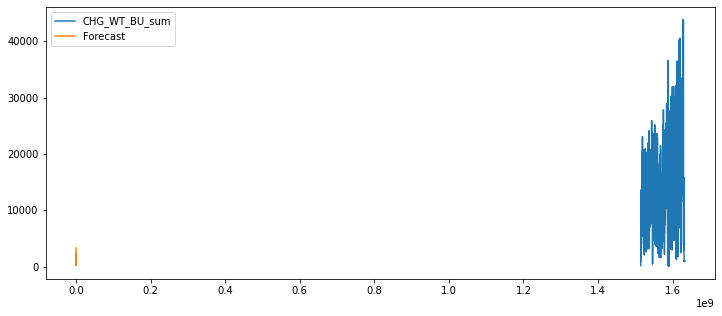

In [153]:
# Train the model on the full dataset
model = model = SARIMAX(data['CHG_WT_BU_sum'], 
                        order = (0, 1, 1), 
                        seasonal_order =(2, 1, 1, 12))
result = model.fit()
  
# Forecast for the next 3 years
forecast = result.predict(start = len(data), 
                          end = (len(data)-1) + 3 * 12, 
                          typ = 'levels').rename('Forecast')
  
# Plot the forecast values
data['CHG_WT_BU_sum'].plot(figsize = (12, 5), legend = True)
forecast.plot(legend = True)